$$6532142421\ Pupipat\ Singkhorn$$

Conclusion for every questions (detail are provided below).

- $Q1$

QUESTION 1: Using PATH method, what is the expected causal effect of X on Y?

    Answer-Q1: -0.42

Causal path: X -> Z -> Y

Total effect of X -> Y = Effect of X -> Z * Effect of Z -> Y 

= (-0.6) * (0.7) = -0.42

- $Q2$

QUESTION 2: What can you identify from this result in combination with the graph above
    
    Answer: 

$equation: Y = 0.6589Z + 0.1159X + 0.4421$

both X and Z have a statistically significant(p-value < 0.001(lookup-table t-dist)) impact on Y, 
but the estimated effect of X (=**0.1159**) is biased due to confoundin(U) and conditioning on the mediator Z.

From the causal graph, X affects Y only through Z, and using the Path Method (Q1), the true causal effect of X on Y = **-0.42**.

The discrepancy arises because OLS fails to account for the unobserved confounder U, which influences both X and Y, leading to an incorrect estimation of the direct effect of X.

- $Q3$

QUESTION 3: Does this match your expection in Q1?

    Answer: Yes

the estimated causal effect (-0.42) using the DoWhy frontdoor criterion with two-stage regression closely matches the expected causal effect (-0.42) calculated using the Path Method in Q1.

This confirms that the frontdoor adjustment method correctly accounts for the mediation effect of Z while handling the confounding from U.

The result validates that our previous theoretical expectation aligns with the causal estimation performed using DoWhy, reinforcing that the true causal effect of X on Y is indeed **-0.42**.

- $Q4$

QUESTION 4: How are the difference between OLS No Backdoor, OLS Backdoor, and DoWhy Backdoor

    Answer:

OLS Backdoor and DoWhys Backdoor method produce similar results ($\beta_X = -0.3947$), correcting for confounding and aligning with theoretical expectations.

OLS No Backdoor control underestimates ($\beta_X = -0.3322$) the causal effect because it ignores confounding (only  X  as a predictor of  Y without adjusting for any confounders).

In [ ]:
# !pip install dowhy econml

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import networkx as nx
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

import dowhy
from dowhy import CausalModel

In [2]:
SAMPLES_SIZE = 1000

In [3]:
# A Simple Data Set
G = nx.DiGraph()
G.add_edges_from([
    ('U', 'X'),
    ('U', 'Y'),
    ('X', 'Z'),
    ('Z', 'Y')
])

U = stats.truncnorm(0, np.infty, scale=4).rvs(SAMPLES_SIZE)
X = 0.7*U + stats.norm(scale=2).rvs(SAMPLES_SIZE)
Z = -0.6*X + stats.norm(scale=2).rvs(SAMPLES_SIZE)
Y = 0.7*Z + 0.25*U + stats.norm(scale=2).rvs(SAMPLES_SIZE)

# QUESTION 1
# Using PATH method, what is the expected causal effect of X on Y?

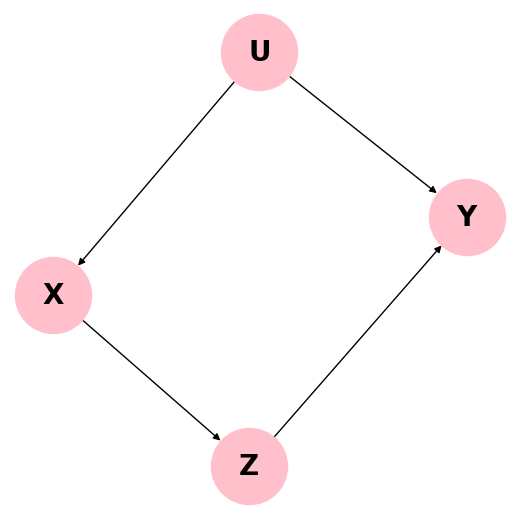

In [ ]:
# TODO: plot
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='pink', font_size=20, font_color='black', font_weight='bold')
plt.show()

QUESTION 1: Using PATH method, what is the expected causal effect of X on Y?

    Answer-Q1: -0.42

Causal path: X -> Z -> Y

Total effect of X -> Y = Effect of X -> Z * Effect of Z -> Y 

= (-0.6) * (0.7) = -0.42

In [5]:
# Try regular OLS
data = pd.DataFrame({'X': X, 'Z': Z})
data = sm.add_constant(data, prepend=True)
model = sm.OLS(Y, data) # Ordinary Linear Regression
results = model.fit()
results.summary()

# QUESTION 2
# What can you identify from this result in combination with the graph above

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     304.7
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          5.49e-104
Time:                        14:22:23   Log-Likelihood:                -2107.0
No. Observations:                1000   AIC:                             4220.
Df Residuals:                     997   BIC:                             4235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5094      0.081      6.293      0.000       0.351       0.668
X              0.1445      0.031      4.686      0.000       0.084       0.205
Z              0.6857      0.032     21.745      0.000       0.624       0.748
==============================================================================
Omnibus:                        0.141   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.135
Skew:                          -0.028   Prob(JB):                        0.935
Kurtosis:                       2.993   Cond. No.                         5.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

QUESTION 2: What can you identify from this result in combination with the graph above
    
    Answer: 

$equation: Y = 0.6589Z + 0.1159X + 0.4421$

both X and Z have a statistically significant(p-value < 0.001(lookup-table t-dist)) impact on Y, 
but the estimated effect of X (=**0.1159**) is biased due to confoundin(U) and conditioning on the mediator Z.

From the causal graph, X affects Y only through Z, and using the Path Method (Q1), the true causal effect of X on Y = **-0.42**.

The discrepancy arises because OLS fails to account for the unobserved confounder U, which influences both X and Y, leading to an incorrect estimation of the direct effect of X.

In [6]:
# Use DoWhy Model
model = CausalModel(
    data=pd.DataFrame({'X': X, 'Y': Y, 'Z': Z}),
    treatment='X',
    outcome='Y',
    graph="\n".join(nx.generate_gml(G))
)

/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/dowhy/causal_model.py:583: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


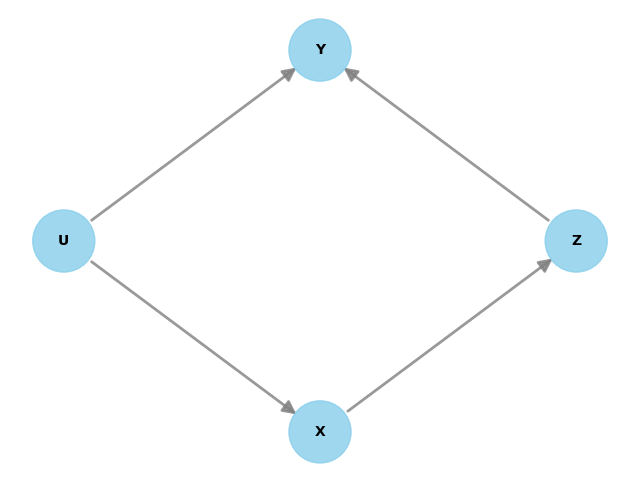

In [7]:
model.view_model()

In [8]:
estimand = model.identify_effect()
print(estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡ d       d       ⎤
E⎢────(Y)⋅────([Z])⎥
 ⎣d[Z]    d[X]     ⎦
Estimand assumption 1, Full-mediation: Z intercepts (blocks) all directed paths from X to Y.
Estimand assumption 2, First-stage-unconfoundedness: If U→{X} and U→{Z} then P(Z|X,U) = P(Z|X)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{Z} and U→Y then P(Y|Z, X, U) = P(Y|Z, X)



In [9]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='frontdoor.two_stage_regression')

print(f'Estimate of causal effect (linear regression): {estimate.value}')

# Question 3: Does this match your expection in Q1?

Estimate of causal effect (linear regression): -0.42377304720809506


QUESTION 3: Does this match your expection in Q1?

    Answer: Yes

the estimated causal effect (-0.42) using the DoWhy frontdoor criterion with two-stage regression closely matches the expected causal effect (-0.42) calculated using the Path Method in Q1.

This confirms that the frontdoor adjustment method correctly accounts for the mediation effect of Z while handling the confounding from U.

The result validates that our previous theoretical expectation aligns with the causal estimation performed using DoWhy, reinforcing that the true causal effect of X on Y is indeed **-0.42**.

In [10]:
refute_subset = model.refute_estimate(
    estimand=estimand,
    estimate=estimate,
    method_name="data_subset_refuter",
    subset_fraction=0.4)

In [11]:
print(refute_subset)

Refute: Use a subset of data
Estimated effect:-0.42377304720809506
New effect:-0.4232292075982626
p value:0.9199999999999999



In [12]:
refute_placebo = model.refute_estimate(
    estimand=estimand,
    estimate=estimate,
    method_name="placebo_treatment_refuter")

In [13]:
print(refute_placebo)

Refute: Use a Placebo Treatment
Estimated effect:-0.42377304720809506
New effect:-0.423773047208095
p value:0.0



In [14]:
# Another Data Set
G = nx.DiGraph()
G.add_edges_from([
    ('U', 'X'),
    ('U', 'Y'),
    ('X', 'Z'),
    ('Z', 'Y'),
    ('I', 'X')
])

U = stats.truncnorm(0, np.infty, scale=4).rvs(SAMPLES_SIZE)
I = stats.norm(scale=10).rvs(SAMPLES_SIZE)
X = 0.7*U + 0.3*I + stats.norm(scale=2).rvs(SAMPLES_SIZE)
Z = -0.6*X + stats.norm(scale=2).rvs(SAMPLES_SIZE)
Y = 0.7*Z + 0.25*U + stats.norm(scale=2).rvs(SAMPLES_SIZE)

In [15]:
# Use DoWhy Model
model = CausalModel(
    data=pd.DataFrame({'X': X, 'Y': Y, 'Z': Z, 'U': U, 'I': I}),
    treatment='X',
    outcome='Y',
    graph="\n".join(nx.generate_gml(G))
)

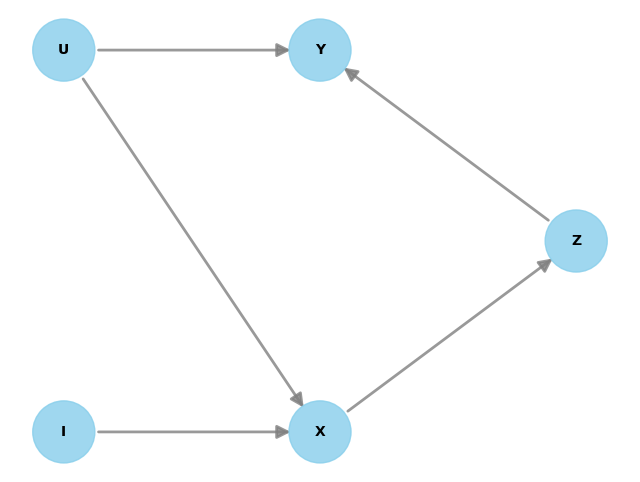

In [16]:
model.view_model()

In [17]:
estimand = model.identify_effect()
print(estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d          
────(E[Y|U])
d[X]        
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,U,U) = P(Y|X,U)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                   -1⎤
 ⎢ d      ⎛ d       ⎞  ⎥
E⎢────(Y)⋅⎜────([X])⎟  ⎥
 ⎣d[I]    ⎝d[I]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{I})
Estimand assumption 2, Exclusion: If we remove {I}→{X}, then ¬({I}→Y)

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡ d       d       ⎤
E⎢────(Y)⋅────([Z])⎥
 ⎣d[Z]    d[X]     ⎦
Estimand assumption 1, Full-mediation: Z intercepts (blocks) all directed paths from X to Y.
Estimand assumption 2, First-stage-unconfoundedness: If U→{X} and U→{Z} then P(Z|X,U) = P(Z|X)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{Z} and U→Y then P(Y|Z, X, U) = P(Y|Z, X)



In [18]:
# No backdoor
data = pd.DataFrame({'X': X})
data = sm.add_constant(data, prepend=True)
model_ols_no_backdoor = sm.OLS(Y, data) # Ordinary Linear Regression
results = model_ols_no_backdoor.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     301.3
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           3.49e-59
Time:                        14:25:57   Log-Likelihood:                -2321.2
No. Observations:                1000   AIC:                             4646.
Df Residuals:                     998   BIC:                             4656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7676      0.087      8.778      0.000       0.596       0.939
X             -0.3322      0.019    -17.358      0.000      -0.370      -0.295
==============================================================================
Omnibus:                        1.135   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                1.017
Skew:                          -0.024   Prob(JB):                        0.601
Kurtosis:                       3.149   Cond. No.                         5.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\therefore$ OLS No Backdoor: $\beta_X = -0.3322$

In [19]:
# Homegrown backdoor
data = pd.DataFrame({'X': X, 'U': U})
data = sm.add_constant(data, prepend=True)
model_ols_backdoor = sm.OLS(Y, data) # Ordinary Linear Regression
results = model_ols_backdoor.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           1.21e-69
Time:                        14:25:58   Log-Likelihood:                -2294.0
No. Observations:                1000   AIC:                             4594.
Df Residuals:                     997   BIC:                             4609.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0922      0.124      0.742      0.458      -0.151       0.336
X             -0.3947      0.020    -19.325      0.000      -0.435      -0.355
U              0.2451      0.033      7.473      0.000       0.181       0.309
==============================================================================
Omnibus:                        0.637   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.512
Skew:                          -0.028   Prob(JB):                        0.774
Kurtosis:                       3.096   Cond. No.                         9.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\therefore$ OLS Backdoor: $\beta_X = -0.3947, \beta_U=0.2451$

In [20]:
estimate_backdoor = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.linear_regression')

print(f'Estimate of causal effect via backdoor (linear regression): {estimate_backdoor.value}')

# QUESTION 4 -- How are the difference between OLS No Backdoor, OLS Backdoor, and DoWhy Backdoor

Estimate of causal effect via backdoor (linear regression): -0.3947006164963863


$\therefore$ DoWhy Backdoor: $\beta_X = -0.3947$

QUESTION 4: How are the difference between OLS No Backdoor, OLS Backdoor, and DoWhy Backdoor

    Answer:

OLS Backdoor and DoWhys Backdoor method produce similar results ($\beta_X = -0.3947$), correcting for confounding and aligning with theoretical expectations.

OLS No Backdoor control underestimates ($\beta_X = -0.3322$) the causal effect because it ignores confounding (only  X  as a predictor of  Y without adjusting for any confounders).

In [21]:
refute_placebo = model.refute_estimate(
    estimand=estimand,
    estimate=estimate_backdoor,
    method_name="placebo_treatment_refuter")

/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/pupipatsingkhorn/miniconda3/envs/datascience/lib/python3.11/site-packages/statsmodels

In [22]:
print(refute_placebo)

Refute: Use a Placebo Treatment
Estimated effect:-0.3947006164963863
New effect:0.0
p value:1.0



In [23]:
estimate_iv = model.estimate_effect(
    identified_estimand=estimand,
    method_name='iv.instrumental_variable')

print(f'Estimate of causal effect via IV: {estimate_iv.value}')

Estimate of causal effect via IV: -0.3912598668999661


In [24]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor

estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.dml.DML',
    method_params={
        'init_params': {
            'model_y': GradientBoostingRegressor(),
            'model_t': GradientBoostingRegressor(),
            'model_final': LassoCV(fit_intercept=False),
        },
        'fit_params': {}}
)

print(f'Estimate of causal effect (DML): {estimate.value}')

Estimate of causal effect (DML): -0.3579060638957235


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
